
Firstly, we'll import three Python libraries: pandas (as pd), numpy (as np), and matplotlib.pyplot (as plt). We'll use these libraries for data manipulation, numerical computing, and data visualization respectively. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

So, what we did here is we loaded a CSV file called 'train_heart.csv' into a pandas DataFrame using the pd.read_csv() function, and we stored this DataFrame in a variable named df. Then, we used the sample() method to randomly select 5 rows from the DataFrame and display them. This helps us get a glimpse of what our data looks like and understand its structure better.

In [2]:
df = pd.read_csv('train_heart.csv')
df.sample(5)

id  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
181   52   45   M           ATA        140          224          1     Normal   
374  192   48   M           ATA        130          245          0     Normal   
169  371   66   M           ASY        150            0          0     Normal   
28   320   59   M           NAP        125            0          1     Normal   
214  503   51   M           ASY        132          227          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
181    122              N      0.0       Up             0  
374    160              N      0.0       Up             0  
169    108              Y      2.0     Flat             1  
28     175              N      2.6     Flat             1  
214    138              N      0.2       Up             0

 We called the isnull() method on our DataFrame df, which checks each element in the DataFrame for missing values and returns a DataFrame of boolean values indicating whether each element is null (True) or not (False). Then, we chained the sum() method to calculate the total number of missing values for each column. This code helps us quickly identify which columns contain missing data and how many missing values there are in each column.

In [16]:
df.isnull().sum()

id                0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Here is we used the info() method on our DataFrame df. This method provides a concise summary of the DataFrame including the number of non-null values, the data type of each column,..,..

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              642 non-null    int64  
 1   Age             642 non-null    int64  
 2   Sex             642 non-null    object 
 3   ChestPainType   642 non-null    object 
 4   RestingBP       642 non-null    int64  
 5   Cholesterol     642 non-null    int64  
 6   FastingBS       642 non-null    int64  
 7   RestingECG      642 non-null    object 
 8   MaxHR           642 non-null    int64  
 9   ExerciseAngina  642 non-null    object 
 10  Oldpeak         642 non-null    float64
 11  ST_Slope        642 non-null    object 
 12  HeartDisease    642 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 65.3+ KB


In this part, we imported the ProfileReport class from the ydata_profiling library, which is used for creating detailed data profiling reports. Then, we created a profile report for our DataFrame df by passing it as an argument to the ProfileReport constructor. Finally, by simply calling profile, we're displaying the generated report, which provides comprehensive insights into the structure, statistics, and characteristics of our dataset, helping us to understand it more deeply and identify potential issues or patterns within the data.

In [18]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

What we did here is we accessed the column labeled 'HeartDisease' from our DataFrame df using square bracket notation, and then we called the value_counts() method on this column. This method counts the occurrences of each unique value in the column and returns a Series with the counts, sorted in descending order by default. By doing this, we can quickly see the distribution of the 'HeartDisease' variable in our dataset.

In [3]:
df['HeartDisease'].value_counts()

1    363
0    279
Name: HeartDisease, dtype: int64

Here's what we did in this code cell:

We first filtered the DataFrame df to select only the rows where the 'Cholesterol' column is not equal to zero. Then, we accessed the 'Cholesterol' column and calculated the mean of these non-zero values using the mean() method.

Next, we replaced the zero values in the 'Cholesterol' column with the calculated mean value. This ensures that only non-zero values contribute to calculating the mean, avoiding skewing the result caused by including zeros.

This corrected approach addresses the issue of including zero values in calculating the mean and replaces them with a more appropriate value based on the non-zero data.

In [20]:
#finding the mean value for zeros vslues in cholestrol
# zero_values=0
# df['Cholesterol']= df['Cholesterol'].replace(zero_values,df['Cholesterol'].mean())
# wrong approach because we include 0 values in calculating  the mean.
#corrected code:
# Calculate the mean of non-zero values in the 'Cholesterol' column
# mean_chol = df[df['Cholesterol'] != 0]['Cholesterol'].mean()

# # Replace zero values with the mean value
# df['Cholesterol'] = df['Cholesterol'].replace(0, mean_chol)

In [4]:
df

id  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    563   55   M           ASY        135          204          1         ST   
1    884   67   M           ASY        160          286          0        LVH   
2    352   56   M           ASY        120            0          0         ST   
3    694   56   M           ATA        120          236          0     Normal   
4    491   75   M           ASY        170          203          1         ST   
..   ...  ...  ..           ...        ...          ...        ...        ...   
637  191   50   M           ATA        170          209          0         ST   
638  311   60   M           ASY        125            0          1     Normal   
639  211   50   F           NAP        140          288          0     Normal   
640  784   65   M            TA        138          282          1        LVH   
641  484   65   M           ASY        134            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      126              Y      1.1     Flat             1  
1      108              Y      1.5     Flat             1  
2      100              Y     -1.0     Down             1  
3      178              N      0.8       Up             0  
4      108              N      0.0     Flat             1  
..     ...            ...      ...      ...           ...  
637    116              N      0.0       Up             0  
638    110              N      0.1       Up             1  
639    140              Y      0.0     Flat             1  
640    174              N      1.4     Flat             1  
641    112              Y      1.1     Flat             1  

[642 rows x 13 columns]

In [22]:
!pip install sns


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In this code block:

After importing matplotlib.pyplot as plt and seaborn, We defined a function visualize_outliers(data) to create a boxplot of features in the provided DataFrame data.

Inside the function, we:
Set up a figure with a size of 10x6.
Plotted a boxplot of the data.
Set the title, x-axis label, y-axis label, and rotated x-axis labels for better readability.
Displayed the plot.

We demonstrated the usage of the visualize_outliers() function with an example DataFrame df. This function aids in visualizing feature distributions and identifying outliers.

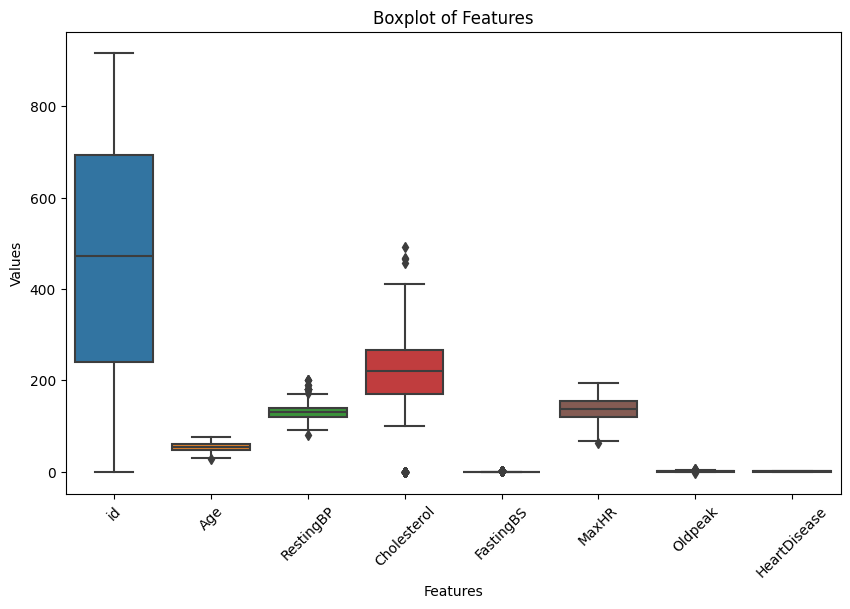

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_outliers(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title("Boxplot of Features")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.show()

# Example usage:
# Assuming 'data' is your dataset, where each row represents a data point and each column represents a feature
visualize_outliers(df)


In this code block:

We imported the winsorize function from scipy.stats.mstats. we used this method used to limit extreme values in a dataset by replacing them with less extreme values.

We created a copy of the DataFrame df named winsorized_data.

We iterated through each numerical column (numerical_cols) in the DataFrame using a loop.

For each numerical column, we applied winsorization with specified limits (5% on each end) using the winsorize function. This replaces extreme values in each column with values at the specified percentiles, effectively reducing the impact of outliers on the dataset.

In [6]:
from scipy.stats.mstats import winsorize
# Define the percentage of data to be winsorized from both ends
# For example, to winsorize the top and bottom 5% of data, set limits to (0.05, 0.05)
lower_limit = 0.05
upper_limit = 0.05

# Winsorize the 'cholesterol' column
winsorized_cholesterol = winsorize(df['Cholesterol'], limits=(lower_limit, upper_limit))

# Replace the 'cholesterol' column in the DataFrame with the winsorized values
df['Cholesterol'] = winsorized_cholesterol

# Optionally, you can reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Print the DataFrame after winsorization
print("DataFrame after winsorization:")
print(df)

DataFrame after winsorization:
      id  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    563   55   M           ASY        135          204          1         ST   
1    884   67   M           ASY        160          286          0        LVH   
2    352   56   M           ASY        120            0          0         ST   
3    694   56   M           ATA        120          236          0     Normal   
4    491   75   M           ASY        170          203          1         ST   
..   ...  ...  ..           ...        ...          ...        ...        ...   
637  191   50   M           ATA        170          209          0         ST   
638  311   60   M           ASY        125            0          1     Normal   
639  211   50   F           NAP        140          288          0     Normal   
640  784   65   M            TA        138          282          1        LVH   
641  484   65   M           ASY        134            0          0     Normal 

This code cell performs the following tasks:

It imports the matplotlib.pyplot library as plt and the seaborn library as sns, both commonly used for data visualization.

Defines a function visualize_outliers(data) to create a boxplot of features in the provided DataFrame data.

Inside the function:

Sets up a figure with a size of 10x6.
Plots a boxplot of the data using sns.boxplot(data=data).
Sets the title, x-axis label, y-axis label, and rotates x-axis labels for better readability.
Displays the plot.
Demonstrates the usage of the visualize_outliers() function with an example DataFrame df. This function helps visualize feature distributions and identify outliers.

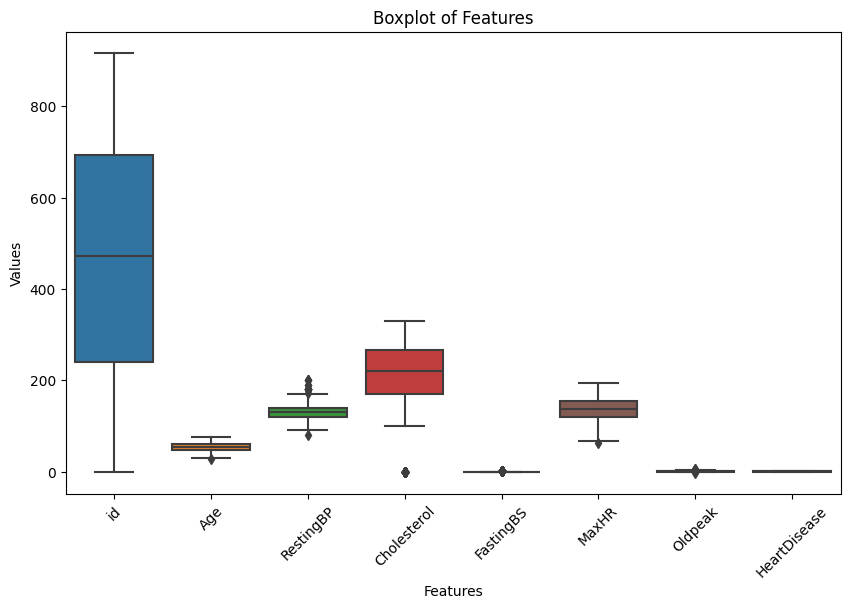

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_outliers(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title("Boxplot of Features")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.show()

# Example usage:
# Assuming 'data' is your dataset, where each row represents a data point and each column represents a feature
visualize_outliers(df)

We've separated the DataFrame df into two parts:

x: This contains the features we'll use for prediction. We achieved this by dropping the columns 'id' and 'HeartDisease' using the drop() method along the columns axis. The resulting DataFrame contains all columns except 'id' and 'HeartDisease'.

y: This contains the target variable we want to predict, which is 'HeartDisease'. We extracted this column from the original DataFrame df.

These operations prepare the data for machine learning tasks, where x represents the input features and y represents the target variable.

In [8]:
x = df.drop(columns=['id','HeartDisease'])
y = df['HeartDisease']


Here, we have created a list feature_cols containing the names of the features we want to use in our analysis or modeling.

In [9]:
feature_cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

In [ ]:
!pip install --upgrade category_encoders

Here we employ the OrdinalEncoder from category_encoders to transform categorical variables into ordinal integers. Specifically:

We imported OrdinalEncoder from category_encoders as ce.

Instantiated OrdinalEncoder as ce_ord, targeting columns 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', and 'ST_Slope'.

Applied the encoding transformation to the feature DataFrame x and stored the result in X_cat.

In [10]:
import category_encoders as ce

ce_ord = ce.OrdinalEncoder(cols = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope'])
X_cat = ce_ord.fit_transform(x)

This code calculates the correlation matrix corr for the transformed feature DataFrame X_cat, and then applies a background gradient style using the 'coolwarm' colormap to visualize the correlations. This style enhances the readability of the correlation matrix by highlighting stronger correlations with warmer colors and weaker correlations with cooler colors.

In [11]:
corr = X_cat.corr()
corr.style.background_gradient(cmap = 'coolwarm')

Here we imported seaborn as sns and matplotlib.pyplot as plt for visualization tasks.

Defined the function visualize_correlation(data) which:

Sets up a figure with a size of 12x10.
Calculates the correlation matrix using data.corr().
Displays the correlation matrix as a heatmap with annotations (annot=True) and using the 'coolwarm' colormap.
Sets the title of the plot as "Correlation Heatmap".
Finally, displays the heatmap.

Demonstrated the usage of the visualize_correlation() function with an example DataFrame X_cat. This function helps visualize the pairwise correlations between numerical features, aiding in feature selection and understanding relationships within the data.

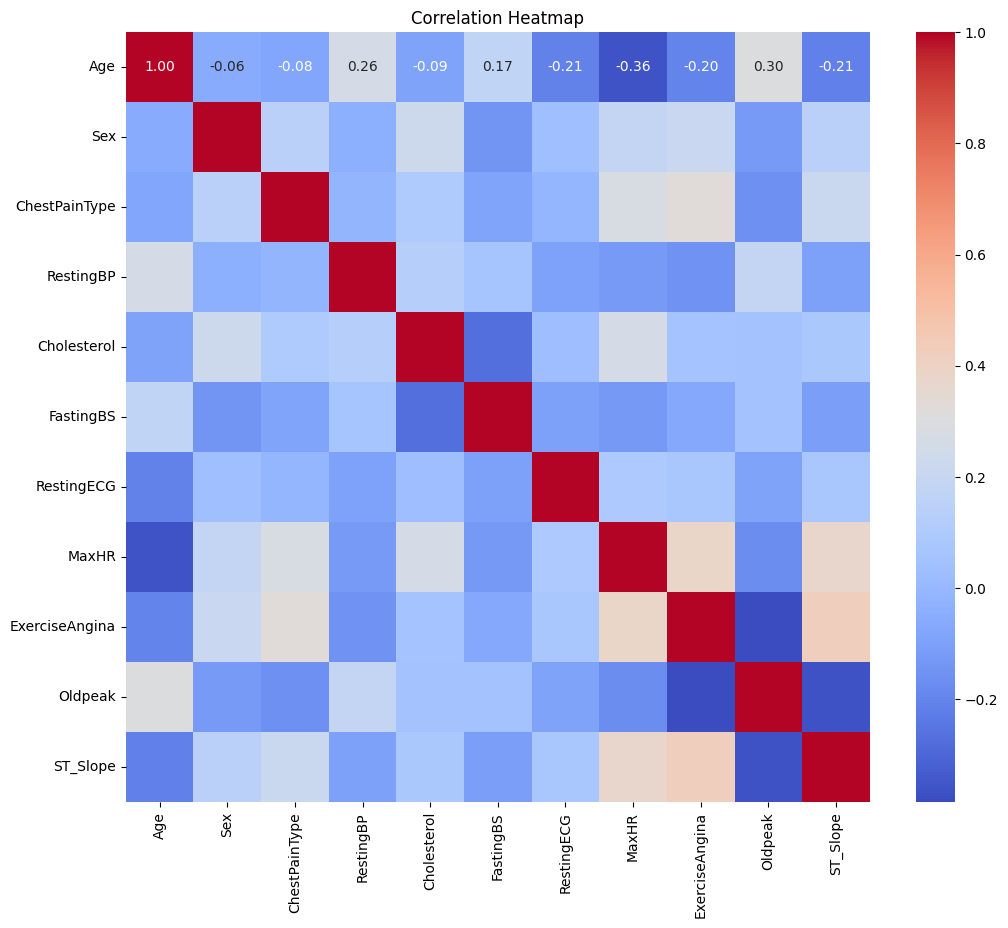

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_correlation(data):
    plt.figure(figsize=(12, 10))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame with numerical features
visualize_correlation(X_cat)


This code cell imports train_test_split from sklearn.model_selection.

It splits X_cat (features) and y (target variable) into training and testing sets, with 70% of the data used for training and 30% for testing (test_size=0.3).

It assigns the resulting splits to x_train (training features), x_test (testing features), y_train (training target variable), and y_test (testing target variable), enabling subsequent model training and evaluation.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_cat,y,test_size=0.3)

Here we imported StandardScaler from sklearn.preprocessing.

We instantiated a StandardScaler object named sc.

Before scaling, we printed the first row of the training set x_train to observe its values.

We applied feature scaling to both the training and testing sets using the fit_transform method of the StandardScaler object sc. This method simultaneously fits the scaler to the training data and transforms it.

After scaling, we printed the first row of the scaled training set x_train to demonstrate the effect of the scaling transformation on the data.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train[:1])

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
516   70    1              3        160          269          0           3   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
516    112               1      2.9         1  
[[ 1.70927207 -0.49372797  1.22684481  1.50481537  0.73012287 -0.53184316
   0.73182492 -0.97168144 -1.1517052   1.82853246 -0.91563636]]


In [15]:
x_train.shape

(449, 11)

In [16]:
x_test.shape

(193, 11)

Here we displayed the transformed feature DataFrame after ordinal encodingPrinting. 

In [17]:
print(X_cat)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     55    1              1        135          204          1           1   
1     67    1              1        160          286          0           2   
2     56    1              1        120            0          0           1   
3     56    1              2        120          236          0           3   
4     75    1              1        170          203          1           1   
..   ...  ...            ...        ...          ...        ...         ...   
637   50    1              2        170          209          0           1   
638   60    1              1        125            0          1           3   
639   50    2              3        140          288          0           3   
640   65    1              4        138          282          1           2   
641   65    1              1        134            0          0           3   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

This line of code imports the DecisionTreeClassifier class from the sklearn.tree module. Decision trees are a popular machine learning algorithm used for classification tasks. The DecisionTreeClassifier class implements a decision tree classifier capable of performing multi-class classification tasks. With this import, we can now instantiate and use the decision tree classifier in our machine learning workflow.

In [18]:
from sklearn.tree import DecisionTreeClassifier

This code initializes variables max_reg and max_score to store the best model and its corresponding score, respectively. best_max_depth is initialized to store the depth of the best-performing decision tree.

It iterates over a range of values for the max_depth parameter, from 3 to 14.

Inside the loop, it creates a decision tree classifier (rf_reg) with the current max_depth value and fits it to the training data (x_train, y_train).

It calculates the accuracy score of the classifier on the testing data (x_test, y_test) using the score method.

It prints the max_depth, accuracy score, and the current maximum score.

If the current accuracy score is greater than the previous maximum score, it updates max_score, max_reg, and best_max_depth with the new values.

Finally, it prints the tuple t containing the max_depth value and the maximum score achieved. This tuple represents the optimal max_depth and the corresponding accuracy score achieved by the decision tree classifier.

In [19]:
max_reg = None
max_score = 0  
best_max_depth = None
t=()
for m in range(3, 15) :
    rf_reg = DecisionTreeClassifier(max_depth=m)
    rf_reg = rf_reg.fit(x_train, y_train) 
    rf_reg_score = rf_reg.score(x_test,y_test)
    print (m, rf_reg_score ,max_score) 
    if rf_reg_score > max_score :
        max_score = rf_reg_score
        max_reg = rf_reg
        
        best_max_depth = rf_reg.max_depth
        
        t = (m,max_score) 
print (t)

3 0.8290155440414507 0
4 0.8031088082901554 0.8290155440414507
5 0.7875647668393783 0.8290155440414507
6 0.8290155440414507 0.8290155440414507
7 0.7823834196891192 0.8290155440414507
8 0.7979274611398963 0.8290155440414507
9 0.7875647668393783 0.8290155440414507
10 0.7927461139896373 0.8290155440414507
11 0.8031088082901554 0.8290155440414507
12 0.7823834196891192 0.8290155440414507
13 0.7979274611398963 0.8290155440414507
14 0.8031088082901554 0.8290155440414507
(3, 0.8290155440414507)


We instantiated a decision tree classifier (clf) with the criterion set to 'entropy' to maximize information gain, and the max_depth parameter set to the optimal value best_max_depth that we determined through our previous optimization process.

Next, we trained the classifier (clf) on the training data (x_train, y_train) using the fit method. This process involved finding the best decision boundaries based on the provided training dataset.

Now, clf represents a decision tree classifier optimized with the best max_depth value for our specific dataset."

In [20]:
clf = DecisionTreeClassifier(criterion = "entropy",max_depth=best_max_depth)
clf = clf.fit(x_train, y_train)

In this code cell We imported necessary libraries for visualization, including StringIO from io, Image from IPython.display, export_graphviz from sklearn.tree, and pydotplus.

We created a StringIO object dot_data to store the graph data in DOT format.

We used the export_graphviz function to export the decision tree clf to the DOT format, specifying various parameters like filled, rounded, special_characters, feature_names, and class_names to enhance visualization.

We generated a graph using pydotplus.graph_from_dot_data by passing the DOT data stored in dot_data.

Finally, we displayed the decision tree graph as an image using Image(graph.create_png()), adjusting the width to 550 pixels for better visualization.

This code generates and displays a visual representation of the decision tree classifier, allowing us to interpret its decision-making process.

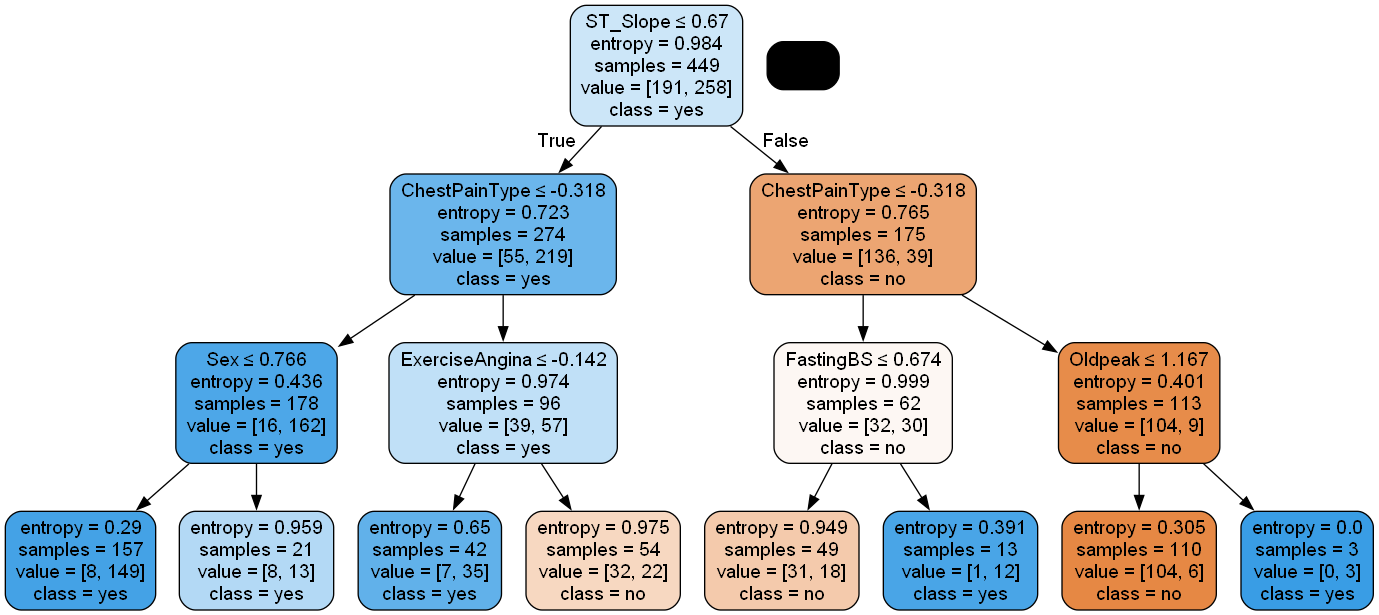

In [21]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width = 550)


We used the trained decision tree classifier clf to make predictions on the testing feature set x_test. This was done using the predict method, which applies the learned decision boundaries to classify the data points in x_test into the respective classes. The resulting predictions were stored in the variable y_pred, representing the predicted labels for the testing data.

In [22]:
y_pred=clf.predict(x_test)

In [23]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In this part we imported confusion_matrix and accuracy_score from sklearn.metrics.

We used the confusion_matrix function to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. It compares the actual labels (y_test) with the predicted labels (y_pred).

We printed the confusion matrix cm to display the results.

We calculated the accuracy score using the accuracy_score function, which measures the accuracy of the classifier by comparing the correct predictions with the total number of predictions made.

We printed the accuracy score to provide an overall assessment of the classifier's performance on the testing data.

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[74 14]
 [19 86]]
0.8290155440414507


Test case

In [ ]:
#predication=clf.predict([[13,1,2,24,5,1,3,27,1,21,3]])
#print(predication)

This code utilizes seaborn and matplotlib.pyplot libraries to visualize the confusion matrix cm generated earlier. Here's what the code does:

It imports seaborn as sns and matplotlib.pyplot as plt.

It creates a heatmap visualization of the confusion matrix using sns.heatmap.

The argument cm is passed to sns.heatmap to provide the confusion matrix data.

The annot=True parameter adds annotations (actual values) to the heatmap cells.

The fmt='d' parameter specifies formatting for annotations as integers.

The cmap='Reds' parameter sets the color map for the heatmap to 'Reds', which gradually changes from light to dark shades of red to represent different values.

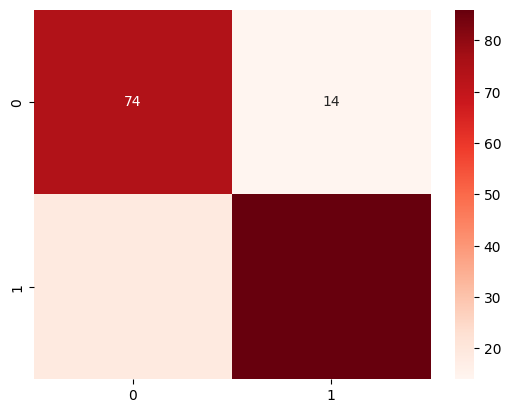

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')

We imported cross_val_score from sklearn.model_selection, which computes the cross-validated accuracy scores for the classifier.

We used cross_val_score to perform 5-fold cross-validation (cv=5) on the training data (x_train, y_train) with the specified scoring metric as 'accuracy'.

We calculated the bias by subtracting the mean of the cross-validated accuracy scores from 1, as bias is inversely related to accuracy.

We calculated the variance by computing the standard deviation of the cross-validated accuracy scores.

Finally, we printed the estimated bias and variance to assess the classifier's performance and its stability across different folds of the training data.

This approach helps in understanding the generalization performance of the classifier and provides insights into potential overfitting or underfitting issues.

In [59]:
from sklearn.model_selection import cross_val_score

# Estimate bias
bias_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
bias_tree = 1 - bias_scores.mean()

# Estimate variance
variance_tree = bias_scores.std()

print("Bias:", bias_tree)
print("Variance:", variance_tree)

Bias: 0.18484394506866408
Variance: 0.008621141089462773


Here we read our CSV file named 'test_heart.csv' into a pandas DataFrame df_test and displays a random sample of 10 rows.

In [27]:
df_test = pd.read_csv('test_heart.csv')
df_test.sample(10)

id  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
167  712   58   M           ASY        100          234          0     Normal   
248  875   58   F           NAP        120          340          0     Normal   
98   631   46   M           ASY        140          311          0     Normal   
47   697   58   M           ASY        150          270          0        LVH   
136  174   52   M           ASY        140          266          0     Normal   
26   885   53   F           NAP        128          216          0        LVH   
6    846   39   M           ASY        118          219          0     Normal   
207  897   55   F           ASY        128          205          0         ST   
5    667   65   F           NAP        140          417          1        LVH   
66    81   54   M           ATA        120          238          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
167    156              N      0.1       Up  
248    172              N      0.0       Up  
98     120              Y      1.8     Flat  
47     111              Y      0.8       Up  
136    134              Y      2.0     Flat  
26     115              N      0.0       Up  
6      140              N      1.2     Flat  
207    130              Y      2.0     Flat  
5      157              N      0.8       Up  
66     154              N      0.0       Up

To handle zero values in the 'Cholesterol' column appropriately, we calculated the mean value excluding these zeros. Then, we replaced the zero values in the 'Cholesterol' column with this calculated mean value. This ensures a more accurate estimation of the missing values while avoiding distortion caused by including zeros in the mean calculation.

In [59]:
#finding the mean value for zeros vslues in cholestrol
# zero_values=0
# df['Cholesterol']= df['Cholesterol'].replace(zero_values,df['Cholesterol'].mean())
# wrong approach because we include 0 values in calculating  the mean.
#corrected code:
# Calculate the mean of non-zero values in the 'Cholesterol' column
# mean_chol = df_test[df_test['Cholesterol'] != 0]['Cholesterol'].mean()

# # Replace zero values with the mean value
# df_test['Cholesterol'] = df_test['Cholesterol'].replace(0, mean_chol)

In [28]:
# Define the percentage of data to be winsorized from both ends
# For example, to winsorize the top and bottom 5% of data, set limits to (0.05, 0.05)
lower_limit = 0.05
upper_limit = 0.05

# Winsorize the 'cholesterol' column
winsorized_cholesterol = winsorize(df_test['Cholesterol'], limits=(lower_limit, upper_limit))

# Replace the 'cholesterol' column in the DataFrame with the winsorized values
df_test['Cholesterol'] = winsorized_cholesterol

# Optionally, you can reset the index of the DataFrame
df_test.reset_index(drop=True, inplace=True)

# Print the DataFrame after winsorization
print("DataFrame after winsorization:")
print(df_test)

DataFrame after winsorization:
      id  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    637   43   M           ASY        115          303          0     Normal   
1    430   57   M           ASY        128            0          1         ST   
2    711   66   M           ASY        120          302          0        LVH   
3    375   73   F           NAP        160            0          0         ST   
4    183   46   M           ASY        110          238          0         ST   
..   ...  ...  ..           ...        ...          ...        ...        ...   
271  133   56   M           ASY        150          230          0         ST   
272   66   45   F           ASY        132          297          0     Normal   
273  470   53   M           ASY        126            0          0     Normal   
274  898   35   M           ATA        122          192          0     Normal   
275  182   52   M           ASY        140          340          0     Normal 

Here we select specific columns from the DataFrame df_test to create a new DataFrame test, containing only the features specified in the list features_col_test. 

In [29]:
features_col_test= ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
test=df_test[features_col_test]

After importing OrdinalEncoder, We created an instance of OrdinalEncoder named ce_ord, specifying the columns to encode as ordinal: 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', and 'ST_Slope'.

We applied the ordinal encoding transformation to the test feature DataFrame test using the fit_transform() method of ce_ord, and stored the transformed DataFrame in X_cat_test.

In [30]:
ce_ord = ce.OrdinalEncoder(cols = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope'])
X_cat_test = ce_ord.fit_transform(test)

In [31]:
print(X_cat_test)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     43    1              1        115          303          0           1   
1     57    1              1        128            0          1           2   
2     66    1              1        120          302          0           3   
3     73    2              2        160            0          0           2   
4     46    1              1        110          238          0           2   
..   ...  ...            ...        ...          ...        ...         ...   
271   56    1              1        150          230          0           2   
272   45    2              1        132          297          0           1   
273   53    1              1        126            0          0           1   
274   35    1              3        122          192          0           1   
275   52    1              1        140          340          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [32]:
# Assuming you have a new dataframe called 'new_data'
# 'sc' is the StandardScaler that was fitted on the training data

# Apply the same scaling transformation to the new dataframe
X_cat_test = sc.fit_transform(X_cat_test)


We used the trained decision tree classifier clf to predict the target variable for the test dataset X_cat_test. The resulting predictions were stored in the variable y_pred_final, representing the final predicted labels for the test data.

In [33]:
y_pred_final=clf.predict(X_cat_test)

In [34]:
y_pred_final

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

This code block creates a DataFrame result_df containing the 'id' column from the test data (df_test) and the corresponding predictions for heart disease ('HeartDisease') generated earlier (y_pred_final). Then, it saves this DataFrame to a CSV file named 'predictionDecisionTree.csv', ensuring that the index is not included in the CSV file. This CSV file will contain the 'id' column along with the predicted values for heart disease, suitable for further analysis or submission.

In [35]:
# Create a DataFrame with 'id' from test_data and predictions
result_df = pd.DataFrame({'id': df_test['id'], 'HeartDisease': y_pred_final})

# Save the DataFrame to a CSV file
result_df.to_csv('predictionDecisionTreeTESTTT.csv', index=False)

This import allows us to utilize the RandomForest algorithm for classification tasks in our machine learning workflow.

In [36]:
from sklearn.ensemble import RandomForestClassifier

This code block iterates through a range of values for the max_depth parameter (from 2 to 14) and trains a random forest classifier (RandomForestClassifier) for each value. Here's a breakdown of what the code does:

In [37]:
max_reg = None
max_score = 0  
best_max_depth = None
t=()
for m in range(2, 15) :
    rf_reg = RandomForestClassifier(max_depth=m)
    rf_reg = rf_reg.fit(x_train, y_train) 
    rf_reg_score = rf_reg.score(x_test,y_test)
    print (m, rf_reg_score ,max_score) 
    if rf_reg_score > max_score :
        max_score = rf_reg_score
        max_reg = rf_reg
        
        best_max_depth = rf_reg.max_depth
        
        t = (m,max_score) 
print (t)

2 0.8601036269430051 0
3 0.8601036269430051 0.8601036269430051
4 0.8704663212435233 0.8601036269430051
5 0.8652849740932642 0.8704663212435233
6 0.8756476683937824 0.8704663212435233
7 0.8497409326424871 0.8756476683937824
8 0.8497409326424871 0.8756476683937824
9 0.8601036269430051 0.8756476683937824
10 0.844559585492228 0.8756476683937824
11 0.8497409326424871 0.8756476683937824
12 0.8704663212435233 0.8756476683937824
13 0.8393782383419689 0.8756476683937824
14 0.8549222797927462 0.8756476683937824
(6, 0.8756476683937824)


After importing the RandomForestClassifier class from the sklearn.ensemble module.

we instantiate a random forest classifier rfc with 400 decision trees (n_estimators = 400) and the optimal max_depth value.

It fits the random forest classifier to the training data (x_train, y_train) using the fit method, training the model on the provided training dataset.

Now, rfc represents a random forest classifier optimized with the best max_depth value and ready for prediction.

In [38]:
rfc = RandomForestClassifier(n_estimators = 400,max_depth=best_max_depth)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=400)

We used the trained random forest classifier rfc to make predictions on the testing feature set x_test. This was done using the predict method, which applies the ensemble of decision trees to classify the data points in x_test into the respective classes. The resulting predictions were stored in the variable y_pred_forest, representing the predicted labels for the testing data.

In [39]:
y_pred_forest = rfc.predict(x_test)

In [40]:
y_pred_forest

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

We calculated the confusion matrix and accuracy score to evaluate the performance of our trained random forest classifier rfc on the testing data

In [41]:
cm = confusion_matrix(y_test, y_pred_forest)
print(cm)
print(accuracy_score(y_test, y_pred_forest))

[[74 14]
 [12 93]]
0.8652849740932642


In this code, we utilized seaborn and matplotlib.pyplot libraries to create a heatmap visualization of the confusion matrix cm. This heatmap provides a visual representation of the classifier's performance by highlighting the distribution of true positive, true negative, false positive, and false negative predictions.

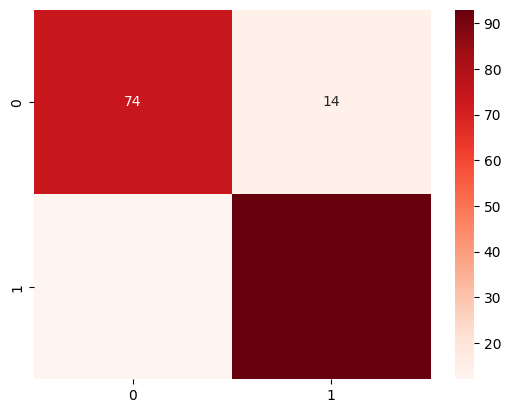

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')

we employed cross-validation to estimate the bias and variance of the random forest classifier rfc. By utilizing 5-fold cross-validation, we assessed the model's performance across different subsets of the training data. The bias was determined by examining the difference between the average accuracy score and perfect accuracy, while the variance was calculated as the standard deviation of the accuracy scores. These metrics help us understand how well the model generalizes to unseen data and its stability across different training sets.

In [60]:
from sklearn.model_selection import cross_val_score

# Estimate bias
bias_scores = cross_val_score(rfc, x_train, y_train, cv=5, scoring='accuracy')
bias_forest = 1 - bias_scores.mean()

# Estimate variance
variance_forest = bias_scores.std()

print("Bias:", bias_forest)
print("Variance:", variance_forest)

Bias: 0.15598002496878904
Variance: 0.02493213289323451


We used the trained random forest classifier rfc to make predictions on the transformed test feature set X_cat_test. The resulting predictions were stored in the variable y_pred_forest_final.

In [44]:
y_pred_forest_final=rfc.predict(X_cat_test)

In [45]:
y_pred_forest_final

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

Here we create a DataFrame result_df containing the 'id' column from the test data df_test and the corresponding predictions for heart disease ('HeartDisease') generated using the random forest classifier. Then, it saves this DataFrame to a CSV file named 'predictionRandomForest.csv', ensuring that the index is not included in the CSV file. This CSV file will contain the 'id' column along with the predicted values for heart disease.






In [46]:
# Create a DataFrame with 'id' from test_data and predictions
result_df = pd.DataFrame({'id': df_test['id'], 'HeartDisease': y_pred_forest_final})

# Save the DataFrame to a CSV file
result_df.to_csv('predictionRandomForest.csv', index=False)

This code imports the GradientBoostingClassifier class from sklearn.ensemble, enabling us to utilize the Gradient Boosting algorithm for classification tasks.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

Here we iterate through different values for the max_depth parameter (from 2 to 14) and trains Gradient Boosting classifiers accordingly. For each iteration, it evaluates the classifier's performance on the testing data and tracks the best-performing model based on the accuracy score. Finally, it identifies the optimal max_depth value that maximizes the accuracy score.

In [48]:
max_reg = None
max_score = 0  
best_max_depth = None
t=()
for m in range(2, 15) :
    gb_reg = GradientBoostingClassifier(max_depth=m)
    gb_reg = gb_reg.fit(x_train, y_train) 
    gb_reg_score = gb_reg.score(x_test,y_test)
    print (m, gb_reg_score ,max_score) 
    if gb_reg_score > max_score :
        max_score = gb_reg_score
        max_reg = gb_reg
        
        best_max_depth = gb_reg.max_depth
        
        t = (m,max_score) 
print (t)

2 0.844559585492228 0
3 0.8497409326424871 0.844559585492228
4 0.8186528497409327 0.8497409326424871
5 0.8393782383419689 0.8497409326424871
6 0.8393782383419689 0.8497409326424871
7 0.8238341968911918 0.8497409326424871
8 0.844559585492228 0.8497409326424871
9 0.8082901554404145 0.8497409326424871
10 0.7979274611398963 0.8497409326424871
11 0.7875647668393783 0.8497409326424871
12 0.7823834196891192 0.8497409326424871
13 0.7875647668393783 0.8497409326424871
14 0.7875647668393783 0.8497409326424871
(3, 0.8497409326424871)


Here we instantiate a Gradient Boosting classifier gb with the optimal max_depth value (best_max_depth) determined from the previous optimization process. Then, we fit the classifier to the training data (x_train, y_train) using the fit method. This step trains the Gradient Boosting model on the provided training dataset.

In [49]:
gb = GradientBoostingClassifier(max_depth=best_max_depth)
gb.fit(x_train, y_train)

GradientBoostingClassifier()


We utilized the trained Gradient Boosting classifier gb to predict the target variable for the test dataset x_test. The resulting predictions were stored in y_pred_gb.

In [50]:
y_pred_gb = gb.predict(x_test)

In [51]:
y_pred_gb

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

We calculated the confusion matrix cm and accuracy score to evaluate the performance of our trained Gradient Boosting classifier gb on the testing data.

In [52]:
cm = confusion_matrix(y_test, y_pred_gb)
print(cm)
print(accuracy_score(y_test, y_pred_gb))

[[74 14]
 [15 90]]
0.8497409326424871


This code block utilizes seaborn and matplotlib.pyplot libraries to visualize the confusion matrix cm generated earlier. It creates a heatmap visualization of the confusion matrix with annotations to provide a visual representation of the classifier's performance.

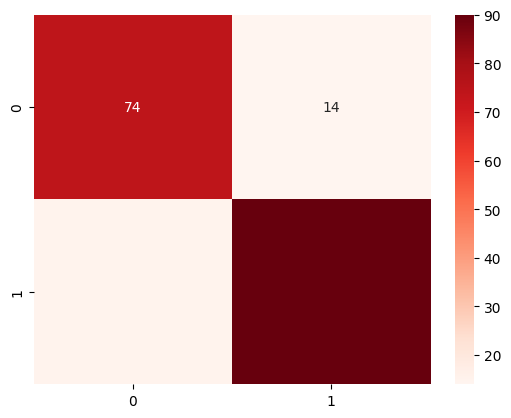

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds')

In this step we utilized cross-validation to estimate the bias and variance of the Gradient Boosting classifier gb. We computed cross-validated accuracy scores for the classifier using 5-fold cross-validation on the training data (x_train, y_train). The bias was estimated by calculating the difference between the average accuracy score and perfect accuracy, while the variance was determined as the standard deviation of the accuracy scores. Finally, we printed the estimated bias and variance to assess the model's performance and stability across different folds of the training data.

In [61]:
from sklearn.model_selection import cross_val_score

# Estimate bias
bias_scores = cross_val_score(gb, x_train, y_train, cv=5, scoring='accuracy')
bias_gb = 1 - bias_scores.mean()

# Estimate variance
variance_gb = bias_scores.std()

print("Bias:", bias_gb)
print("Variance:", variance_gb)

Bias: 0.15825218476903868
Variance: 0.03177307589347651


We used the trained Gradient Boosting classifier gb to predict the target variable for the transformed test feature set X_cat_test. This enabled us to generate final predictions for the test dataset. The resulting predictions were stored in the variable y_pred_gb_final.

In [55]:
y_pred_gb_final=gb.predict(X_cat_test)

In [56]:
y_pred_gb_final

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

And finnaly we created a DataFrame result_df containing the 'id' column from the test data df_test and the corresponding predictions for heart disease ('HeartDisease') generated using the Gradient Boosting classifier. Then, we saved this DataFrame to a CSV file named 'predictionGradientBoosting.csv', ensuring that the index is not included in the CSV file. This file contains the 'id' column along with the predicted values for heart disease, suitable for submission.

In [57]:
# Create a DataFrame with 'id' from test_data and predictions
result_df = pd.DataFrame({'id': df_test['id'], 'HeartDisease': y_pred_gb_final})

# Save the DataFrame to a CSV file
result_df.to_csv('predictionGradientBoosting.csv', index=False)

In [62]:
import pandas as pd

# Initialize an empty list to store the results
results = []

# Add results for Decision Tree
results.append({'Model': 'Decision Tree', 
                'Accuracy': accuracy_score(y_test, y_pred),
                'Bias': bias_tree,
                'Variance': variance_tree})

# Add results for Random Forest
results.append({'Model': 'Random Forest', 
                'Accuracy': accuracy_score(y_test, y_pred_forest),
                'Bias': bias_forest,
                'Variance': variance_forest})

# Add results for Gradient Boosting
results.append({'Model': 'Gradient Boosting', 
                'Accuracy': accuracy_score(y_test, y_pred_gb),
                'Bias': bias_gb,
                'Variance': variance_gb})

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

               Model  Accuracy      Bias  Variance
0      Decision Tree  0.829016  0.184844  0.008621
1      Random Forest  0.865285  0.155980  0.024932
2  Gradient Boosting  0.849741  0.158252  0.031773
